In [1]:
import scanpy as sc
import decoupler as dc
msigdb = dc.get_resource('MSigDB')
msigdb

/Users/luiscorrea/opt/anaconda3/envs/scFUN/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label   genesymbol                          collection  \
0              MSC                oncogenic_signatures   
1              MSC                       mirna_targets   
2              MSC  chemical_and_genetic_perturbations   
3              MSC              immunologic_signatures   
4              MSC  chemical_and_genetic_perturbations   
...            ...                                 ...   
2407729     OR2W5P              immunologic_signatures   
2407730     OR2W5P              immunologic_signatures   
2407731    OR52L2P              immunologic_signatures   
2407732    CSNK2A3              immunologic_signatures   
2407733     AQP12B              immunologic_signatures   

label                                              geneset  
0                                            PKCA_DN.V1_DN  
1                                                 MIR12123  
2                 NIKOLSKY_BREAST_CANCER_8Q12_Q22_AMPLICON  
3        GSE32986_UNSTIM_VS_GMCSF_AND_CURDLAN_LOWDOSE_S...  
4                                   BENPORATH_PRC2_TARGETS  
...                                                    ...  
2407729  GSE22601_DOUBLE_NEGATIVE_VS_CD8_SINGLE_POSITIV...  
2407730  KANNAN_BLOOD_2012_2013_TIV_AGE_65PLS_REVACCINA...  
2407731  GSE22342_CD11C_HIGH_VS_LOW_DECIDUAL_MACROPHAGE...  
2407732  OCONNOR_PBMC_MENVEO_ACWYVAX_AGE_30_70YO_7DY_AF...  
2407733  MATSUMIYA_PBMC_MODIFIED_VACCINIA_ANKARA_VACCIN...  

[2407734 rows x 3 columns]

In [2]:
msigdb.collection.unique()

array(['oncogenic_signatures', 'mirna_targets',
       'chemical_and_genetic_perturbations', 'immunologic_signatures',
       'tf_targets', 'hallmark', 'cancer_modules', 'positional',
       'reactome_pathways', 'kegg_pathways', 'biocarta_pathways',
       'pid_pathways', 'cancer_gene_neighborhoods'], dtype=object)

In [3]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, frameon=True, vector_friendly=True, fontsize=14, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')





In [57]:


scData=sc.read_h5ad("/Users/luiscorrea/Desktop/Bio_analysis/Kurd_D0toD8.h5ad",)



AttributeError: 'NoneType' object has no attribute 'to_adata'

In [5]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

label  genesymbol collection                           geneset
11            MSC   hallmark  HALLMARK_TNFA_SIGNALING_VIA_NFKB
149        ICOSLG   hallmark  HALLMARK_TNFA_SIGNALING_VIA_NFKB
223        ICOSLG   hallmark    HALLMARK_INFLAMMATORY_RESPONSE
270        ICOSLG   hallmark      HALLMARK_ALLOGRAFT_REJECTION
398         FOSL2   hallmark                  HALLMARK_HYPOXIA
...           ...        ...                               ...
878342      FOXO1   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878418        GCG   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878512       PDX1   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878605        INS   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878785       SRP9   hallmark      HALLMARK_PANCREAS_BETA_CELLS

[7318 rows x 3 columns]

In [56]:
scData_raw.var_names

AttributeError: 'NoneType' object has no attribute 'var_names'

In [7]:
scData.var_names = scData.var_names.str.upper()

In [8]:
scData.var.columns

Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'mean', 'std'],
      dtype='object')

In [9]:

scData.var_names

Index(['SNHG6', 'MCM3', 'BAG2', 'CNNM3', 'INPP4A', 'IL18RAP', 'SLC39A10',
       'STAT1', 'NAB1', 'PGAP1',
       ...
       'TAF5', 'GSTO1', 'PDCD4', 'ACSL5', 'TRUB1', 'PDZD8', 'RPS12.PS3',
       'PRDX3', 'MT.ATP8', 'AC149090.1'],
      dtype='object', length=1525)

In [10]:
dc.run_ora(mat=scData, net=msigdb, source='geneset', target='genesymbol',use_raw=False)

In [11]:
acts = dc.get_acts(scData, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 7971 × 45
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    uns: 'dataset_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals'

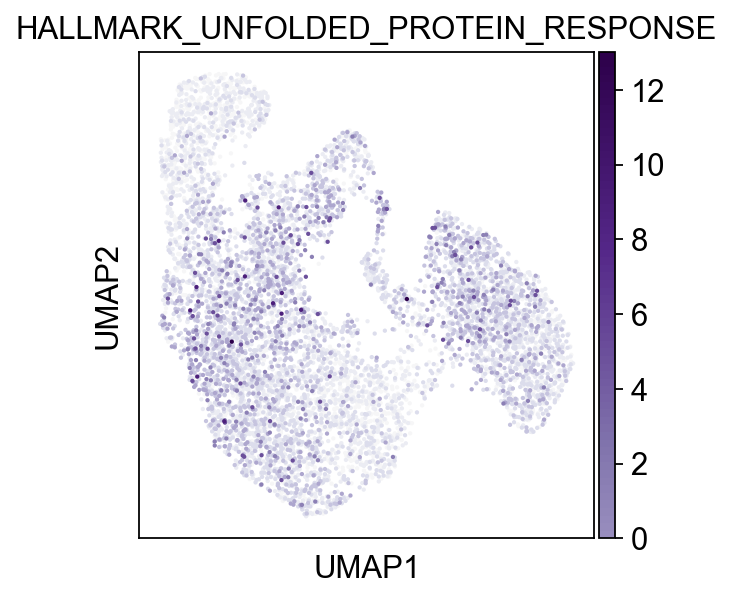

In [12]:
sc.pl.umap(acts, color='HALLMARK_UNFOLDED_PROTEIN_RESPONSE',save="UPR",vcenter=0,cmap="PuOr")



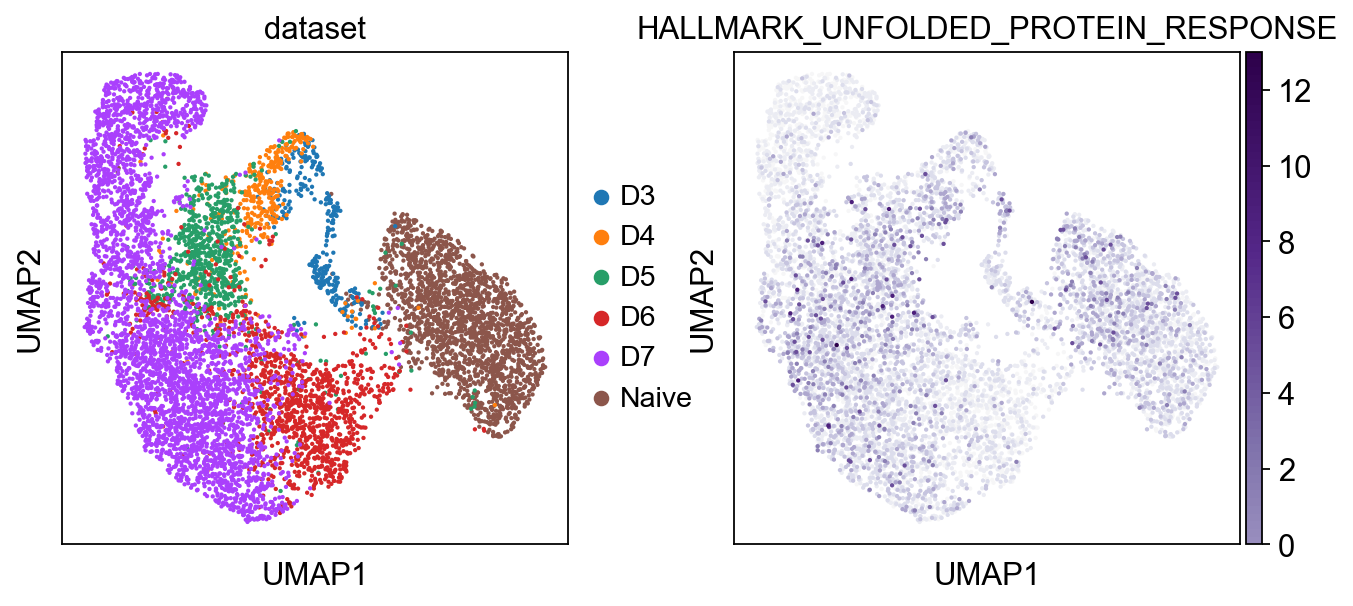

In [14]:
sc.pl.umap(acts, color=['dataset','HALLMARK_UNFOLDED_PROTEIN_RESPONSE',],save="NOTCH",vcenter=0,cmap="PuOr")

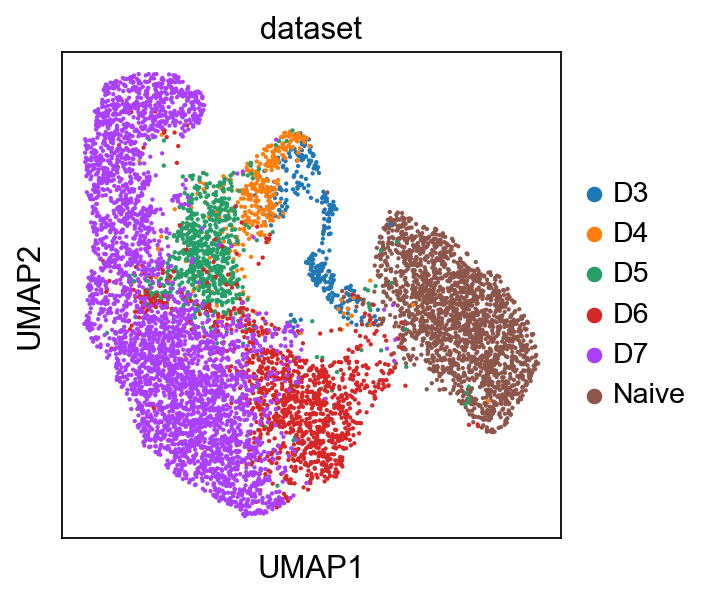

In [15]:
sc.pl.umap(scData,color='dataset',save="Day.tiff")

In [16]:
mean_enr = dc.summarize_acts(acts, groupby='dataset', min_std=1)
mean_enr

HALLMARK_E2F_TARGETS  HALLMARK_G2M_CHECKPOINT  \
D3                 3.114489                 2.696461   
D4                 7.466471                 5.507647   
D5                10.693241                 7.926496   
D6                 2.769128                 2.656046   
D7                 7.543530                 7.235831   
Naive              2.725109                 2.067256   

       HALLMARK_INFLAMMATORY_RESPONSE  HALLMARK_INTERFERON_ALPHA_RESPONSE  \
D3                           4.454181                            7.988204   
D4                           1.086724                            1.075409   
D5                           0.980528                            0.603443   
D6                           1.665607                            0.793670   
D7                           1.632121                            0.900085   
Naive                        2.979891                            1.522377   

       HALLMARK_INTERFERON_GAMMA_RESPONSE  HALLMARK_MITOTIC_SPINDLE  \
D3                              11.916702                  0.838662   
D4                               1.978131                  1.717501   
D5                               1.384969                  2.964530   
D6                               2.224883                  1.240051   
D7                               2.616642                  3.213683   
Naive                            2.603031                  0.581075   

       HALLMARK_MTORC1_SIGNALING  HALLMARK_MYC_TARGETS_V1  \
D3                      3.612197                 4.714957   
D4                      6.201317                 9.208941   
D5                      5.694818                 8.759751   
D6                      2.459948                 2.305710   
D7                      3.482783                 4.832785   
Naive                   3.432522                 6.602643   

       HALLMARK_MYC_TARGETS_V2  HALLMARK_TNFA_SIGNALING_VIA_NFKB  
D3                    5.122987                          3.584869  
D4                    4.866357                          0.998211  
D5                    2.697214                          0.952987  
D6                    1.488797                          2.085567  
D7                    1.840249                          1.951575  
Naive                 3.336356                          3.544598

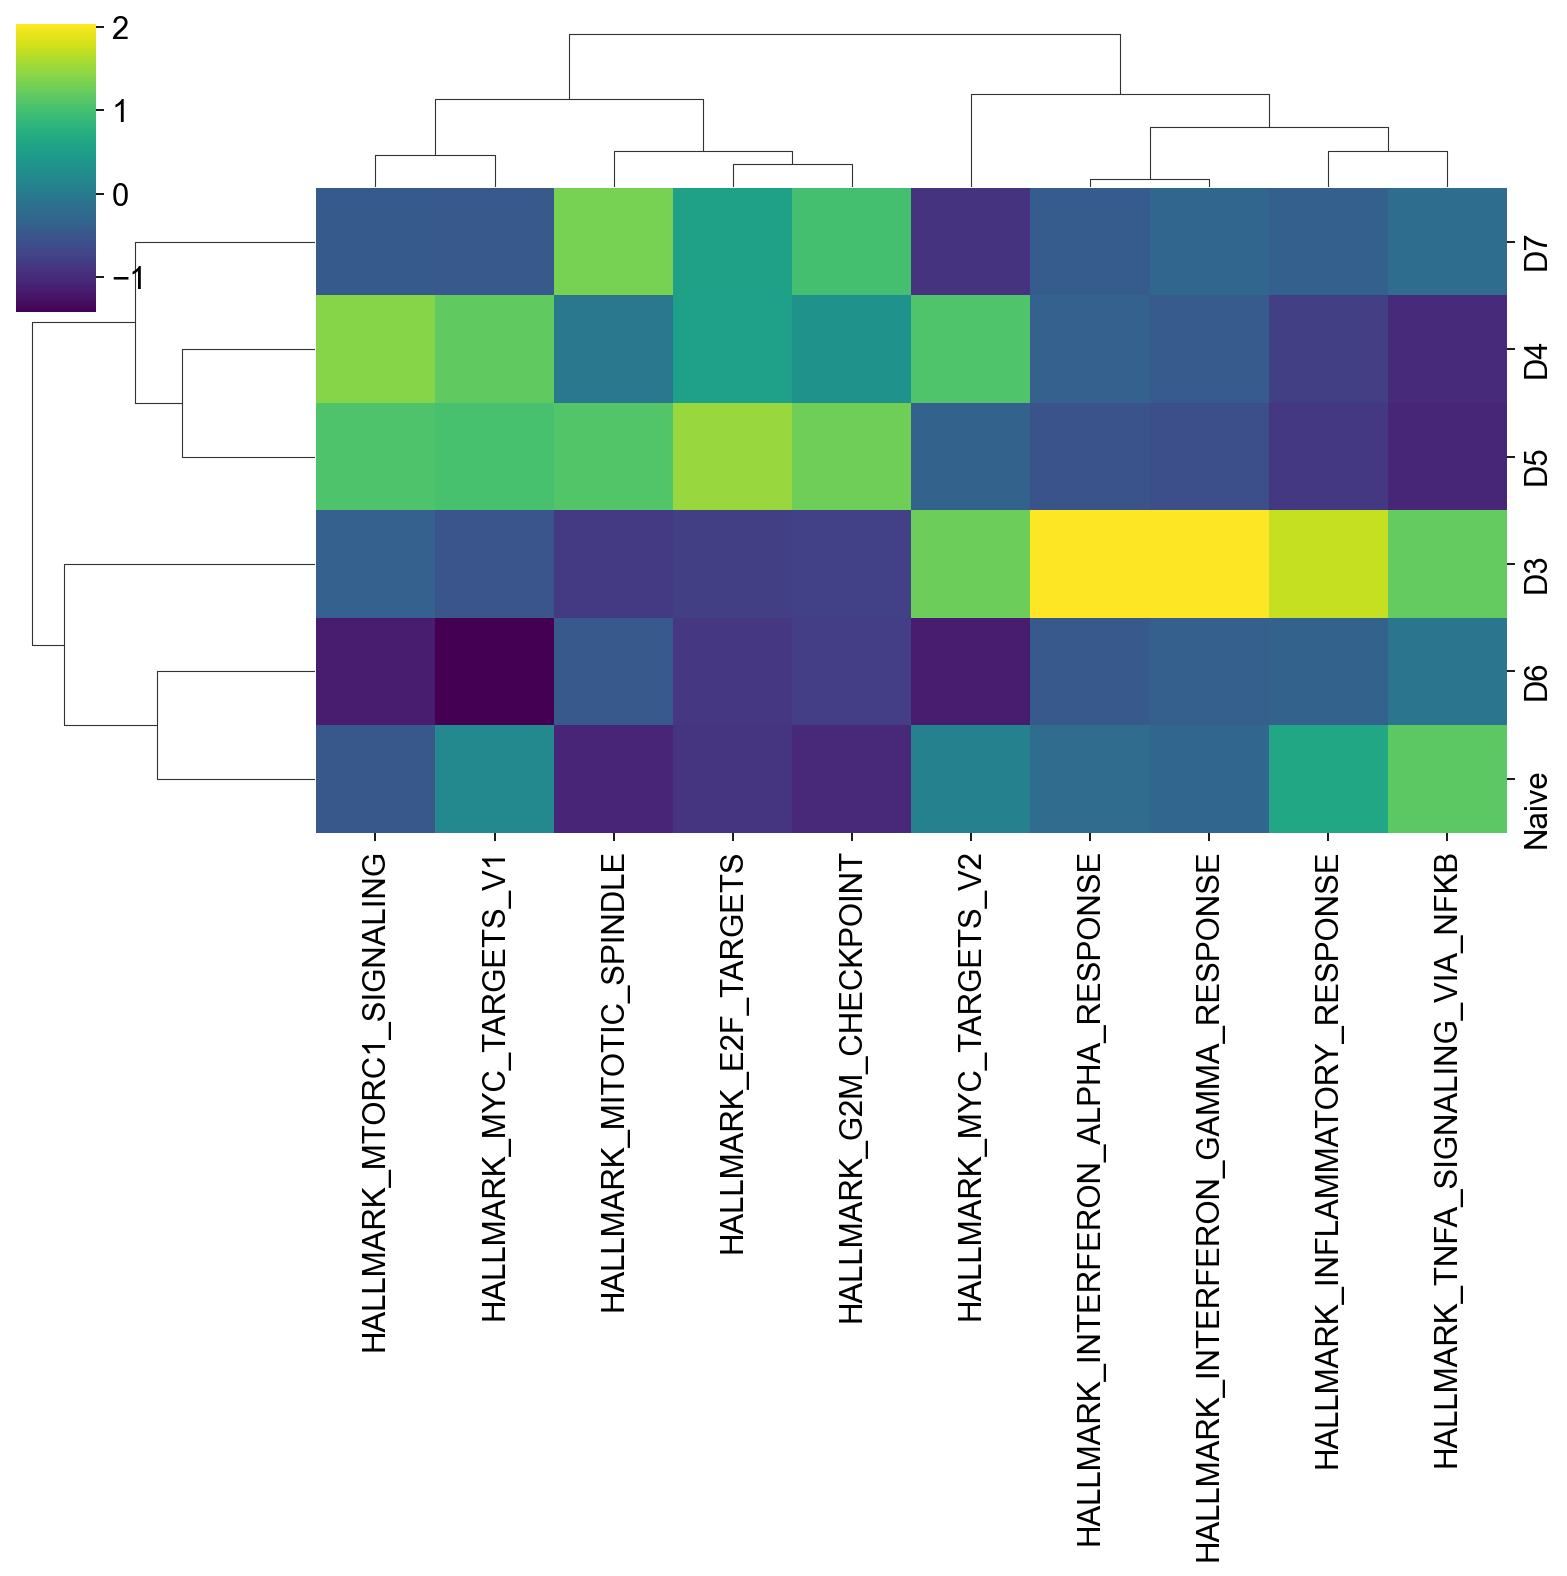

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis',z_score=True)
plt.show()

In [18]:
TFnet = dc.get_dorothea(organism='mouse', levels=['A','B','C'])



In [19]:
TFnet.source=TFnet.source.str.upper()
TFnet.target=TFnet.target.str.upper()

In [20]:
TFnet

source confidence  target    weight
0        E2F4          A    MYCL  1.000000
1        TP53          A    OGG1  1.000000
2        E2F4          A   BACH1  1.000000
3       HIF1A          A     MIF  1.000000
4        E2F4          A   AURKB  1.000000
...       ...        ...     ...       ...
30885    IRF4          C    JAK1  0.333333
30886    IRF4          C    IL16  0.333333
30887    IRF4          C   IKZF3  0.333333
30888    IRF4          C     LPP  0.333333
30889  ZNF740          C  ZNF687  0.333333

[30890 rows x 4 columns]

In [21]:
TFnet.source.unique()

array(['E2F4', 'TP53', 'HIF1A', 'MYB', 'FOXA1', 'STAT5B', 'ETS1', 'NR1H4',
       'STAT1', 'SMAD4', 'E2F3', 'E2F2', 'NR1H3', 'MITF', 'E2F1', 'NR1I2',
       'SP1', 'RXRA', 'MZF1', 'HLF', 'NCOA3', 'STAT3', 'RUNX1', 'NR3C1',
       'GTF2I', 'NR1H2', 'SMAD3', 'HBP1', 'FOS', 'MYC', 'JUN', 'NPAS2',
       'NEUROG3', 'STAT5A', 'NR0B1', 'GLI2', 'GLI3', 'NFAT5', 'NEUROD1',
       'NR5A1', 'TFAP2C', 'TFAP2A', 'PPARG', 'HHEX', 'HIC1', 'HES1',
       'HEY1', 'HEY2', 'HNF4A', 'CTCF', 'TP73', 'RELA', 'NR2F1', 'SREBF2',
       'MYOD1', 'TAL1', 'RUNX2', 'TRPS1', 'SRF', 'CUX1', 'RELB', 'TP63',
       'MYOG', 'NANOG', 'DDIT3', 'NR2E1', 'YY1', 'TEAD1', 'TWIST1',
       'MYCN', 'USF1', 'NFKB1', 'TCF7L2', 'NR2F2', 'WT1', 'TWIST2',
       'MYBL2', 'SMAD5', 'ETS2', 'DNMT1', 'TCFL5', 'MYF6', 'RUNX3',
       'SPI1', 'SOX2', 'HNF1A', 'NR1I3', 'HMGA1', 'PAX8', 'NR4A1',
       'MYBL1', 'STAT6', 'RARA', 'PBX1', 'ESR1', 'POU5F1', 'E2F8', 'E2F6',
       'EGR1', 'GATA3', 'FOXP2', 'FOXO4', 'FOXO3', 'EGR3', 'EGR2',
  

In [22]:
dc.run_mlm(mat=scData, net=TFnet, source='source', target='target', weight='weight', verbose=True,use_raw=False)

Running mlm on mat with 7971 samples and 1525 targets for 146 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]


In [23]:
TFacts = dc.get_acts(scData, obsm_key='mlm_estimate')
TFacts

AnnData object with n_obs × n_vars = 7971 × 146
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    uns: 'dataset_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'mlm_estimate', 'mlm_pvals'

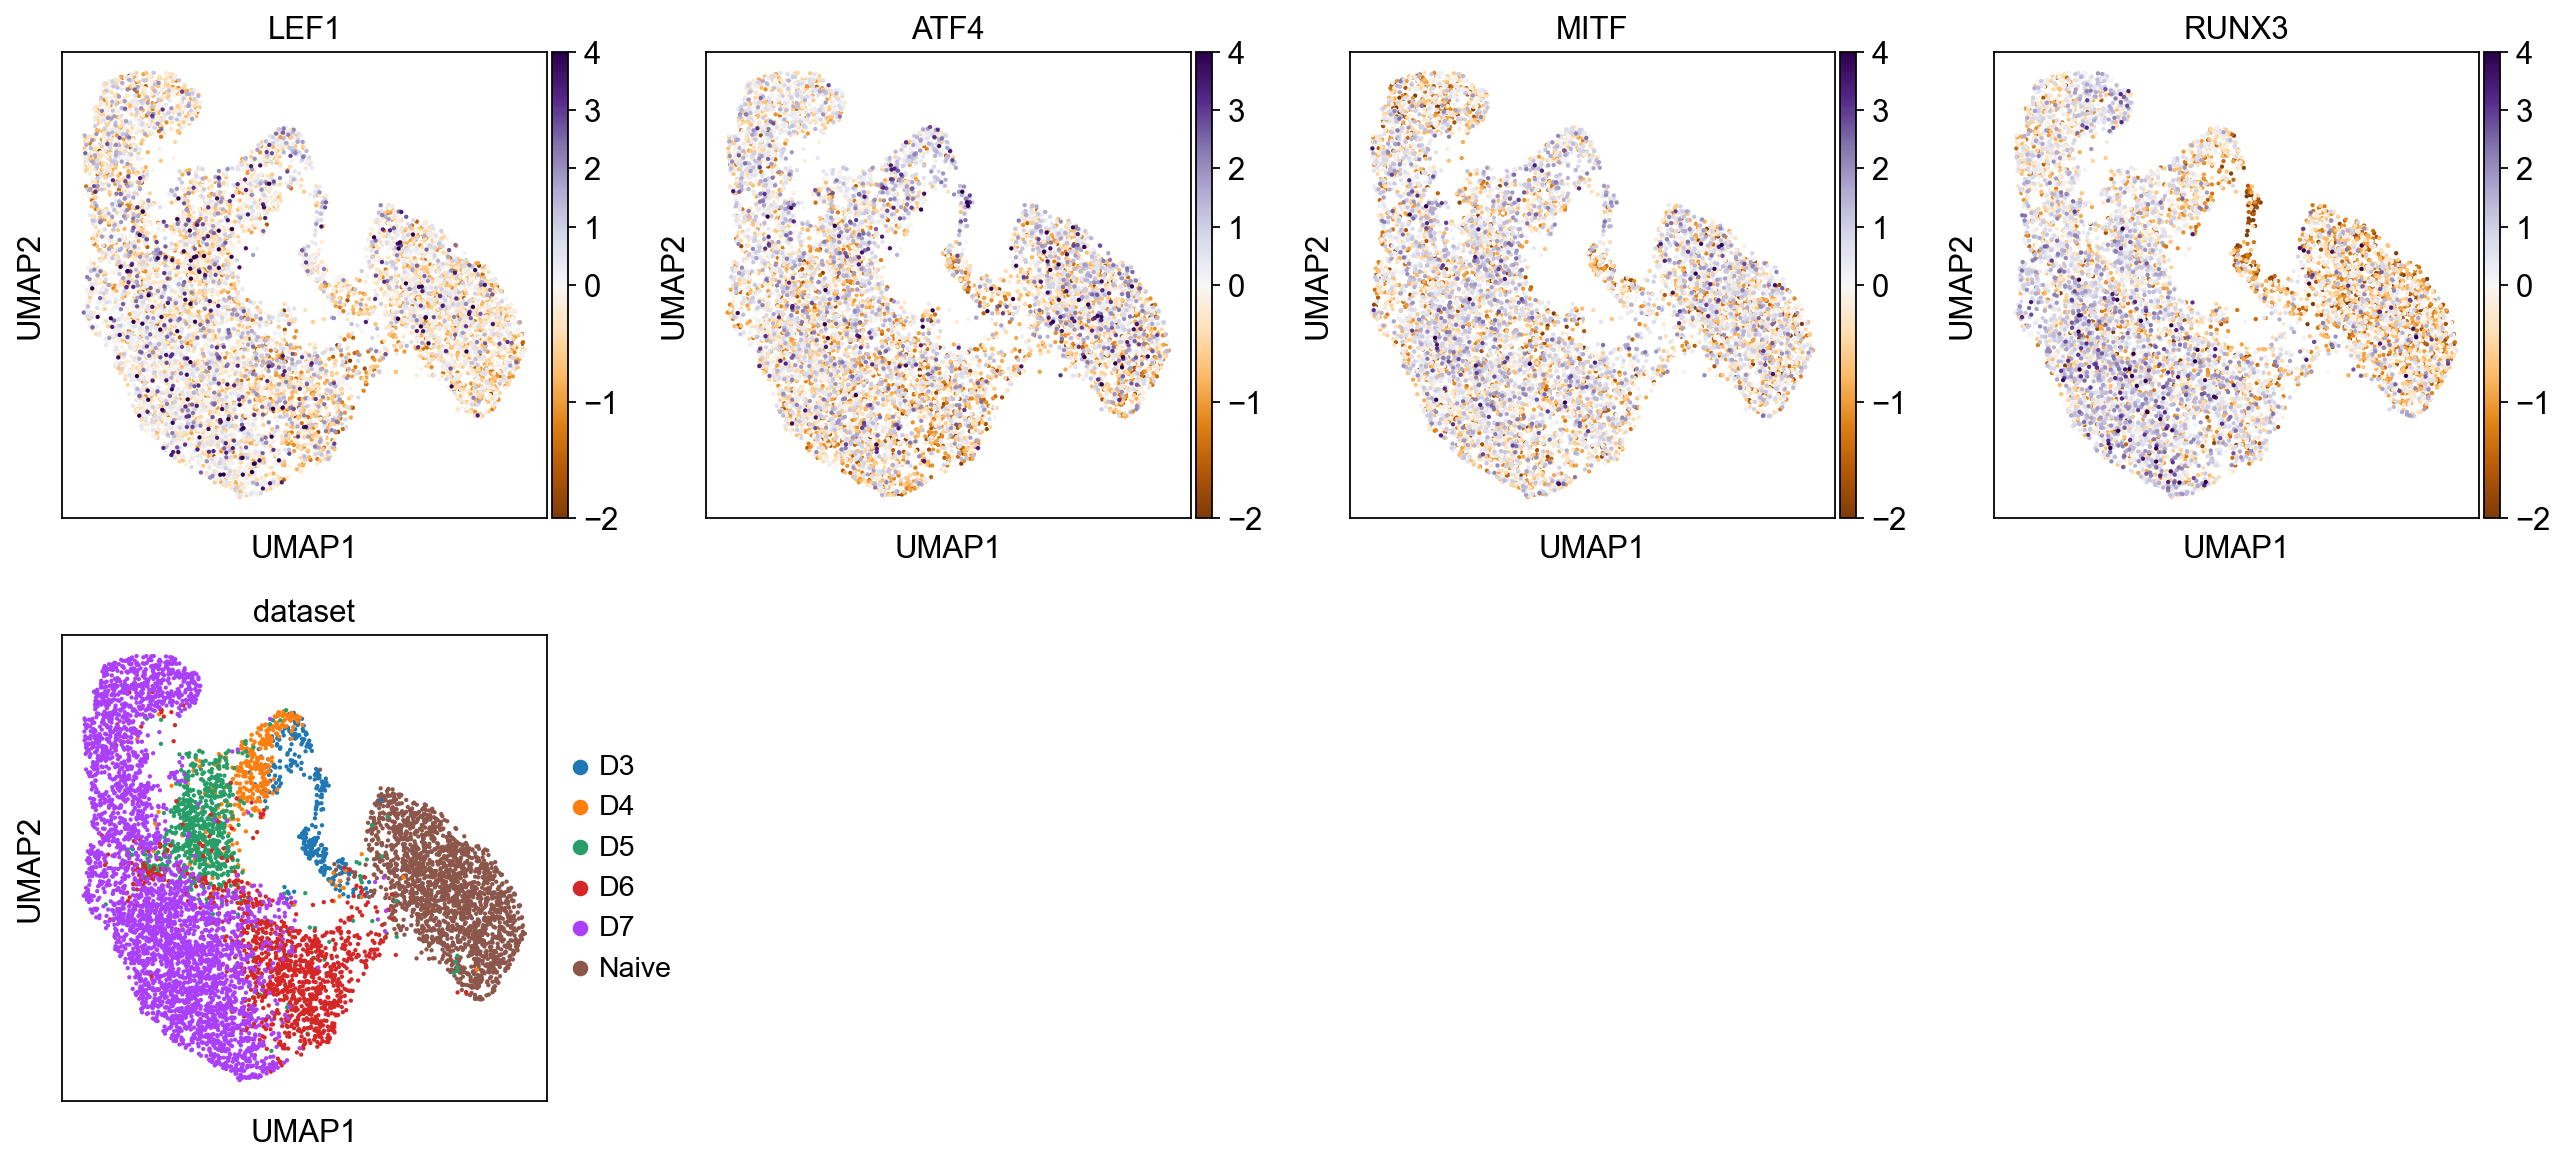

In [27]:
sc.pl.umap(TFacts, color=['LEF1','ATF4','MITF',"RUNX3", 'dataset'], cmap='PuOr',vcenter=0, vmin=-2, vmax=4)

In [28]:
TFmean_acts = dc.summarize_acts(TFacts, groupby='dataset', min_std=.28)
TFmean_acts

ATF2     CREB1      E2F4      E2F6       ERG      ESR1      ESR2  \
D3     0.882128  0.661621 -1.231420  0.476244 -0.842208  0.083221  0.903269   
D4     0.408857  0.306731  0.235395  0.032871  0.012830 -0.381445  0.038872   
D5     0.001239 -0.255070  0.644146 -0.201969  0.202913 -0.208648  0.046852   
D6    -0.296349 -0.261975 -1.286685  0.125754  0.298285  0.218010  0.073812   
D7    -0.538077 -0.080170  0.513306 -0.399290 -0.016517 -0.224694 -0.337126   
Naive  0.942492  0.174936 -0.871985  0.764024 -0.078210  0.585981  0.427524   

          FOSL1     FOXM1     FOXO1  ...      SOX2      SPI1       SRF  \
D3    -0.466525 -0.587963  0.302090  ... -0.706030 -0.547836 -0.323075   
D4    -0.205579 -0.358888 -0.080481  ... -0.301908 -0.383798  0.086817   
D5     0.127028  0.132762 -0.295664  ...  0.105954  0.053442  0.067835   
D6    -0.069207 -0.578897  0.228658  ...  0.174941  0.393782 -0.027255   
D7     0.310361  0.288392 -0.293914  ...  0.316849  0.164491  0.296051   
Naive -0.515456 -0.327927  0.635079  ... -0.495750 -0.313755 -0.623012   

          STAT1     STAT2     STAT4    STAT5B     TBX21    TCF7L2     TFDP1  
D3     0.304686  1.506793 -1.041527  0.556170 -0.373066  0.918091 -0.530917  
D4    -0.421899  0.105310 -0.230536  0.248843 -0.233194  0.234802  0.083582  
D5    -0.175191 -0.236200  0.286316 -0.182632  0.024457 -0.160690  0.433377  
D6     0.119422 -0.240730  0.805499 -0.253943  0.350211 -0.252380 -0.338682  
D7     0.268186 -0.085810  0.279285 -0.136081  0.212391 -0.549545  0.178404  
Naive -0.455245  0.196219 -0.800515  0.281321 -0.402329  1.033044 -0.440424  

[6 rows x 39 columns]

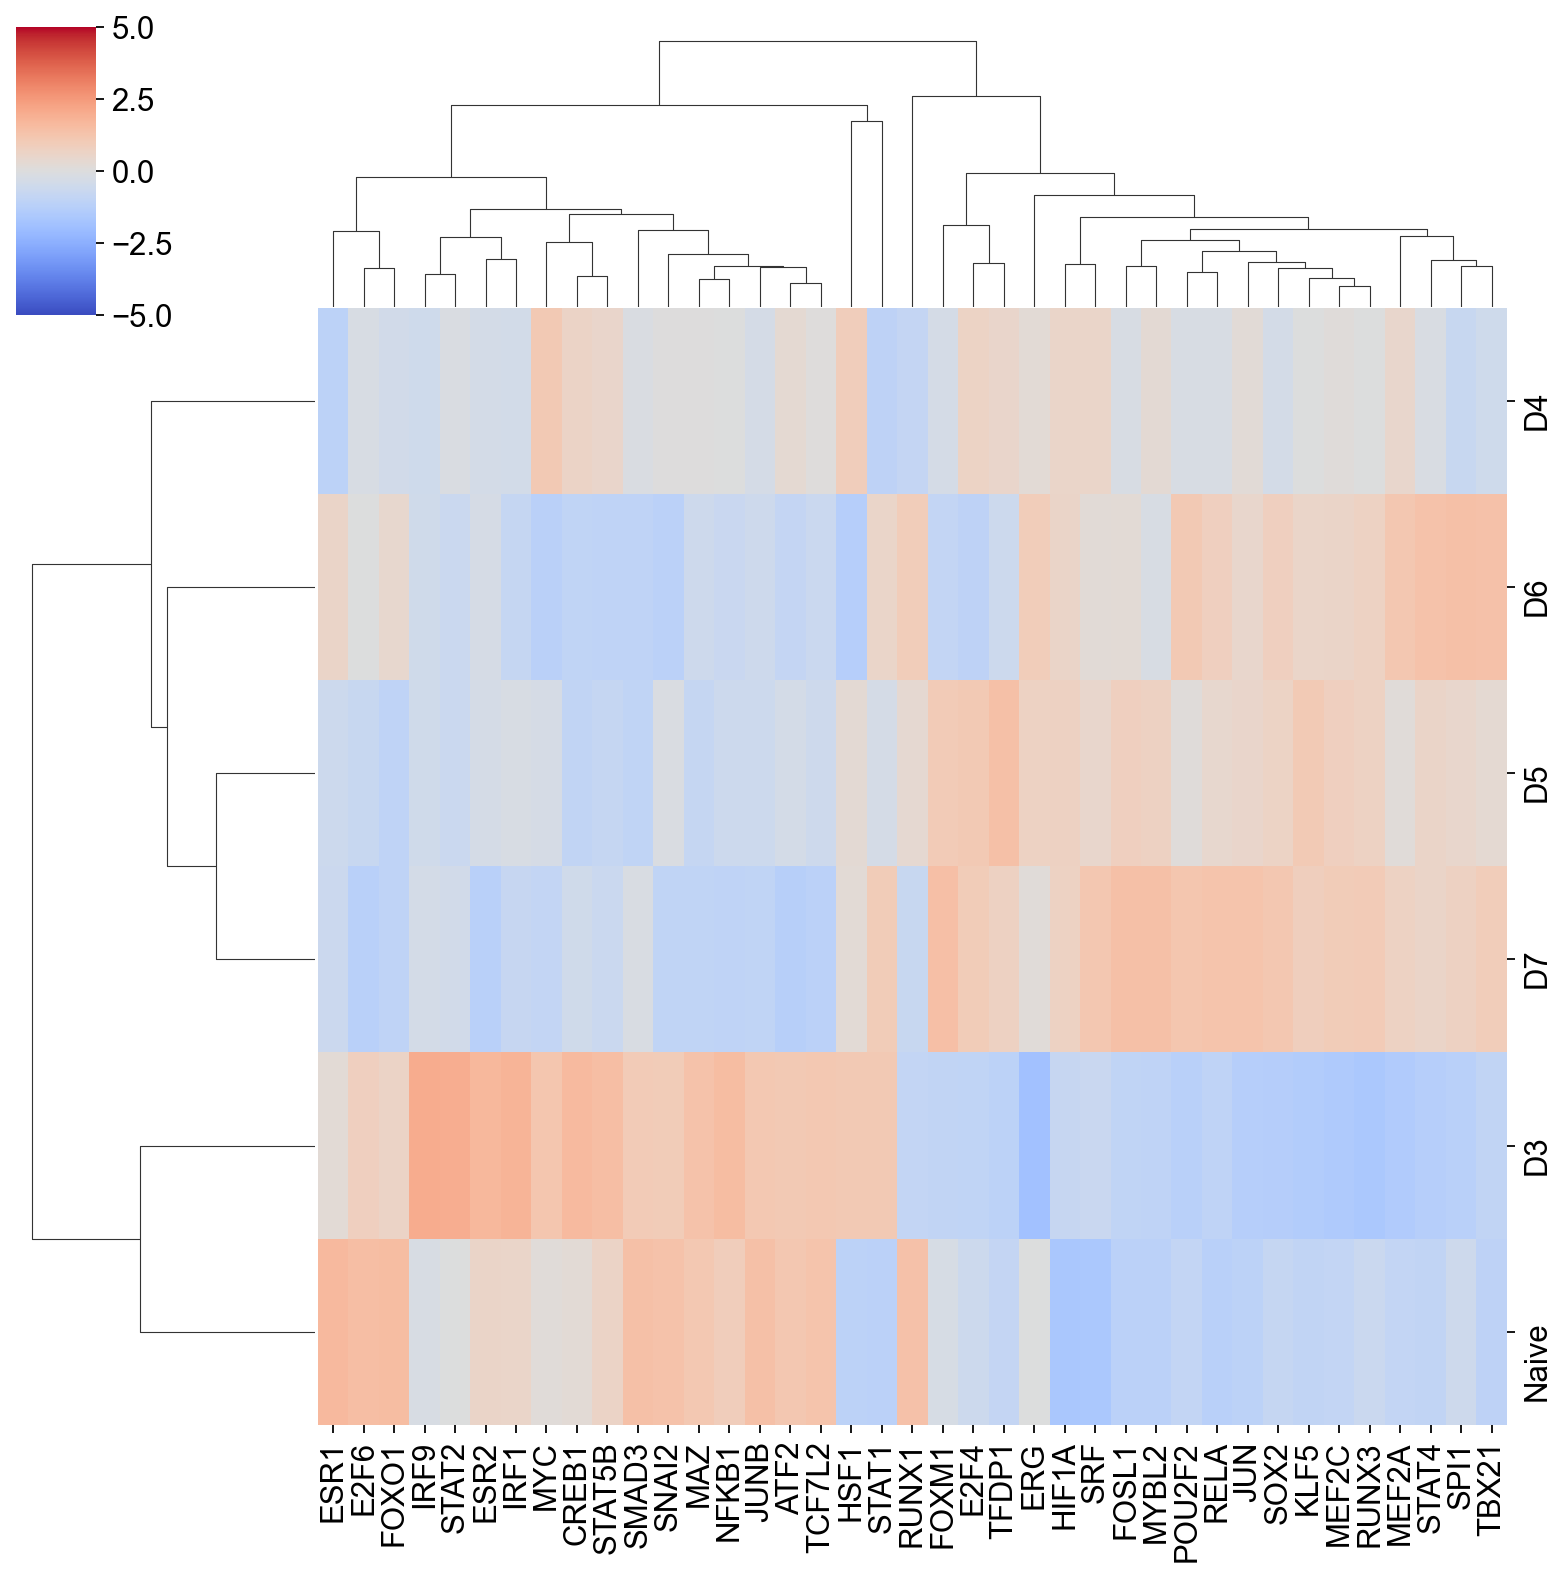

In [29]:
sns.clustermap(TFmean_acts, xticklabels=TFmean_acts.columns, vmin=-5, vmax=5, cmap='coolwarm',z_score=True)
plt.show()

In [30]:
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

label  genesymbol collection                           geneset
11            MSC   hallmark  HALLMARK_TNFA_SIGNALING_VIA_NFKB
149        ICOSLG   hallmark  HALLMARK_TNFA_SIGNALING_VIA_NFKB
223        ICOSLG   hallmark    HALLMARK_INFLAMMATORY_RESPONSE
270        ICOSLG   hallmark      HALLMARK_ALLOGRAFT_REJECTION
398         FOSL2   hallmark                  HALLMARK_HYPOXIA
...           ...        ...                               ...
878342      FOXO1   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878418        GCG   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878512       PDX1   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878605        INS   hallmark      HALLMARK_PANCREAS_BETA_CELLS
878785       SRP9   hallmark      HALLMARK_PANCREAS_BETA_CELLS

[7318 rows x 3 columns]

In [31]:
msigdb_all= dc.get_resource('MSigDB')

In [32]:
msigdb_all.collection.unique()

array(['oncogenic_signatures', 'mirna_targets',
       'chemical_and_genetic_perturbations', 'immunologic_signatures',
       'tf_targets', 'hallmark', 'cancer_modules', 'positional',
       'reactome_pathways', 'kegg_pathways', 'biocarta_pathways',
       'pid_pathways', 'cancer_gene_neighborhoods'], dtype=object)

In [33]:
msigdb_kegg=msigdb_all[msigdb_all['collection']=='kegg_pathways']
msigdb_kegg= msigdb_kegg[~msigdb_kegg.duplicated(['geneset', 'genesymbol'])]


In [35]:
dc.run_ora(mat=scData, net=msigdb_kegg, source='geneset', target='genesymbol',use_raw=False)


In [36]:
kegg_acts = dc.get_acts(scData, obsm_key='ora_estimate')
kegg_acts


AnnData object with n_obs × n_vars = 7971 × 94
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    uns: 'dataset_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'mlm_estimate', 'mlm_pvals'

In [37]:
kegg_acts.var_names.unique()


Index(['KEGG_ABC_TRANSPORTERS', 'KEGG_ACUTE_MYELOID_LEUKEMIA',
       'KEGG_ADHERENS_JUNCTION',
       'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM',
       'KEGG_ALZHEIMERS_DISEASE', 'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
       'KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM',
       'KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS',
       'KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION', 'KEGG_APOPTOSIS',
       'KEGG_ARGININE_AND_PROLINE_METABOLISM',
       'KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC',
       'KEGG_AXON_GUIDANCE', 'KEGG_BASAL_TRANSCRIPTION_FACTORS',
       'KEGG_BASE_EXCISION_REPAIR', 'KEGG_BLADDER_CANCER',
       'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY',
       'KEGG_CALCIUM_SIGNALING_PATHWAY', 'KEGG_CELL_ADHESION_MOLECULES_CAMS',
       'KEGG_CELL_CYCLE', 'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
       'KEGG_CHRONIC_MYELOID_LEUKEMIA', 'KEGG_COLORECTAL_CANCER',
       'KEGG_CYSTEINE_AND_METHIONINE_METABOLISM',
       'KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION',
 

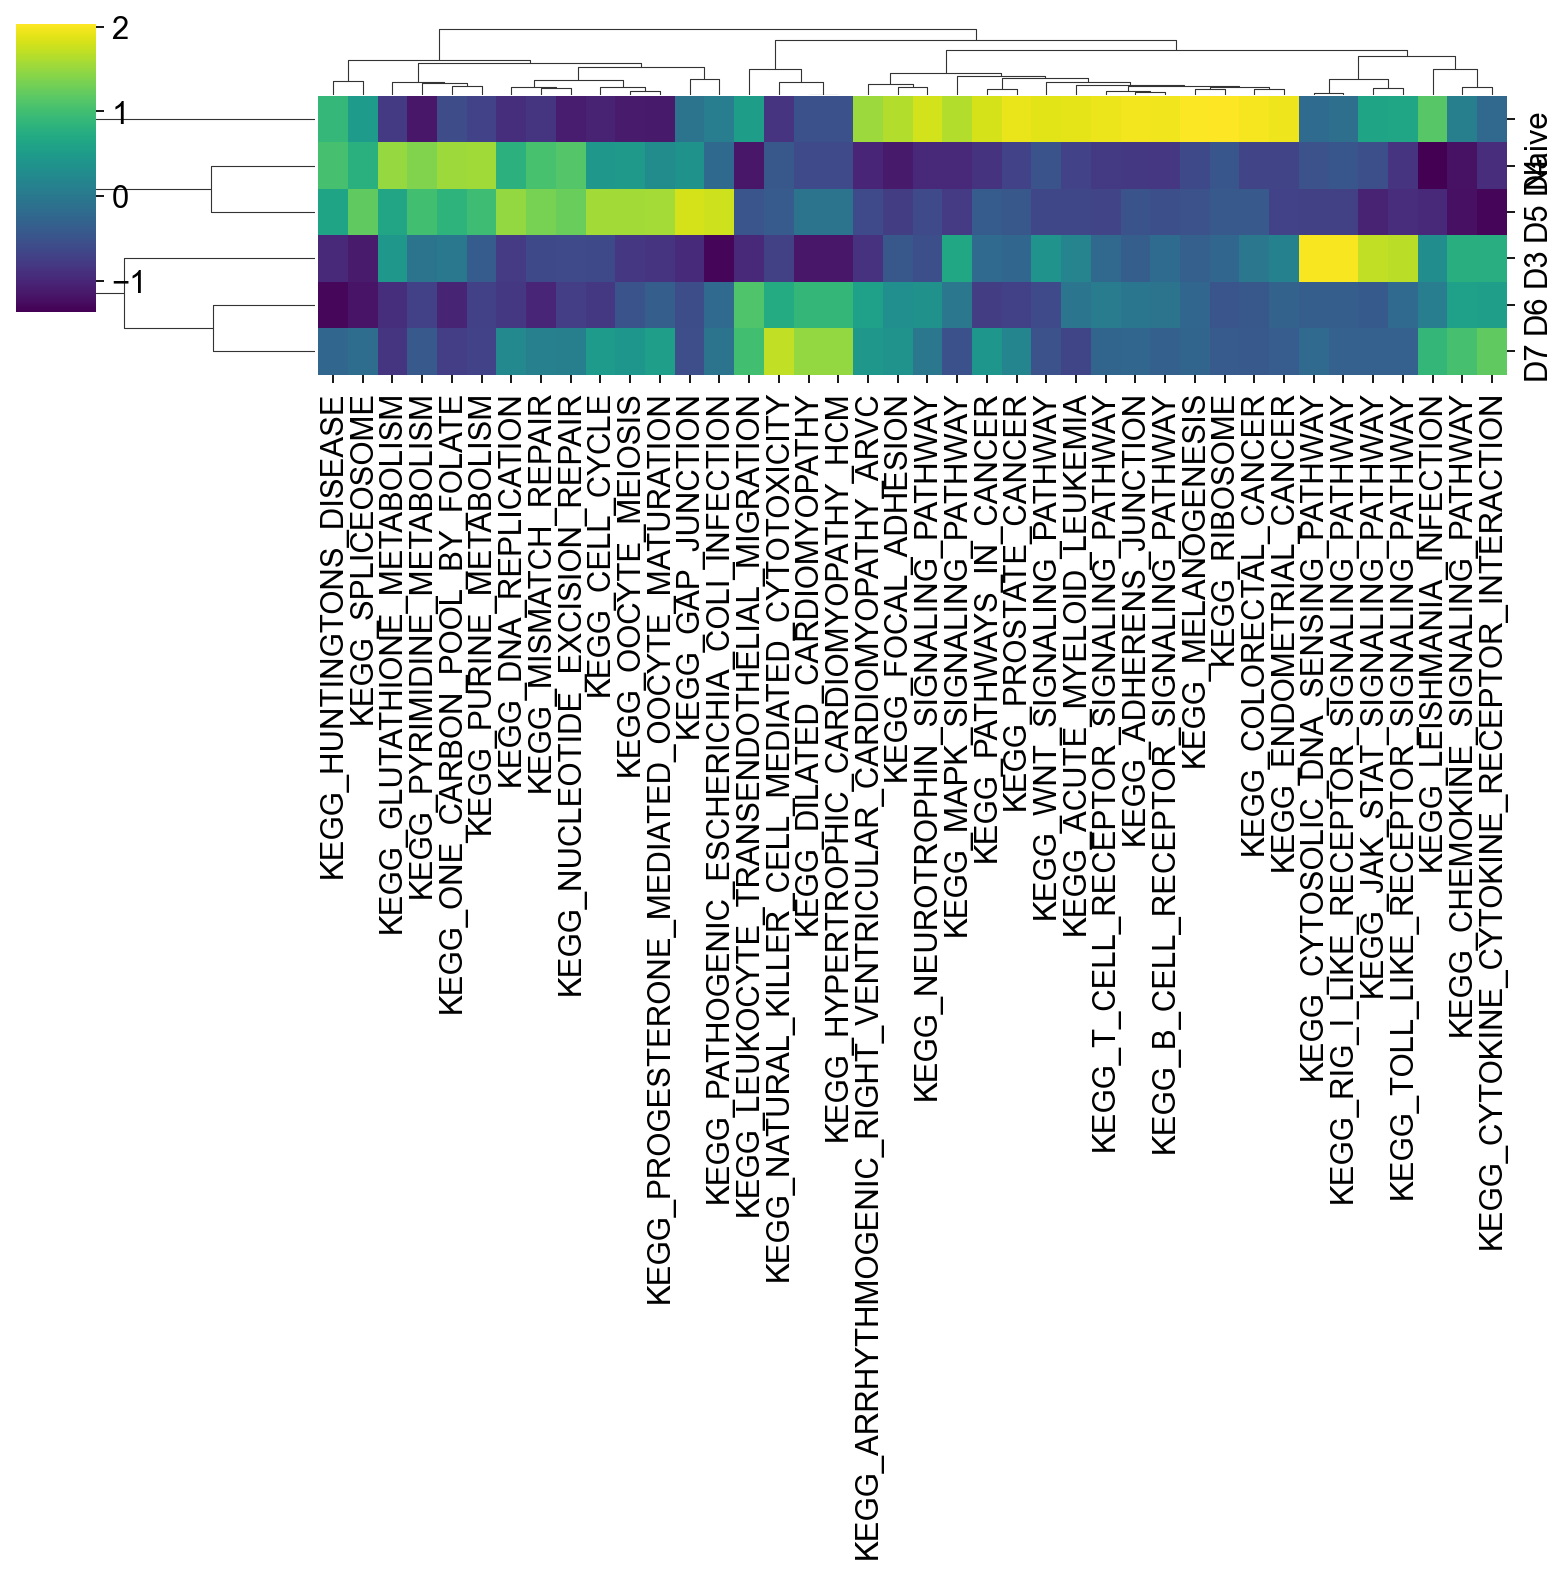

In [38]:
kegg_mean_enr = dc.summarize_acts(kegg_acts, groupby='dataset', min_std=.35)
kegg_mean_enr
sns.clustermap(kegg_mean_enr, xticklabels=kegg_mean_enr.columns, cmap='viridis',z_score=True)
plt.show()

In [39]:
#reactome_pathways

In [41]:
msigdb_reac=msigdb_all[msigdb_all['collection']=='reactome_pathways']
msigdb_reac= msigdb_reac[~msigdb_reac.duplicated(['geneset', 'genesymbol'])]


In [42]:
dc.run_ora(mat=scData, net=msigdb_reac, source='geneset', target='genesymbol',use_raw=False)

/Users/luiscorrea/opt/anaconda3/envs/scFUN/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [43]:
reac_acts = dc.get_acts(scData, obsm_key='ora_estimate')
reac_acts

AnnData object with n_obs × n_vars = 7971 × 494
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    uns: 'dataset_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'mlm_estimate', 'mlm_pvals'

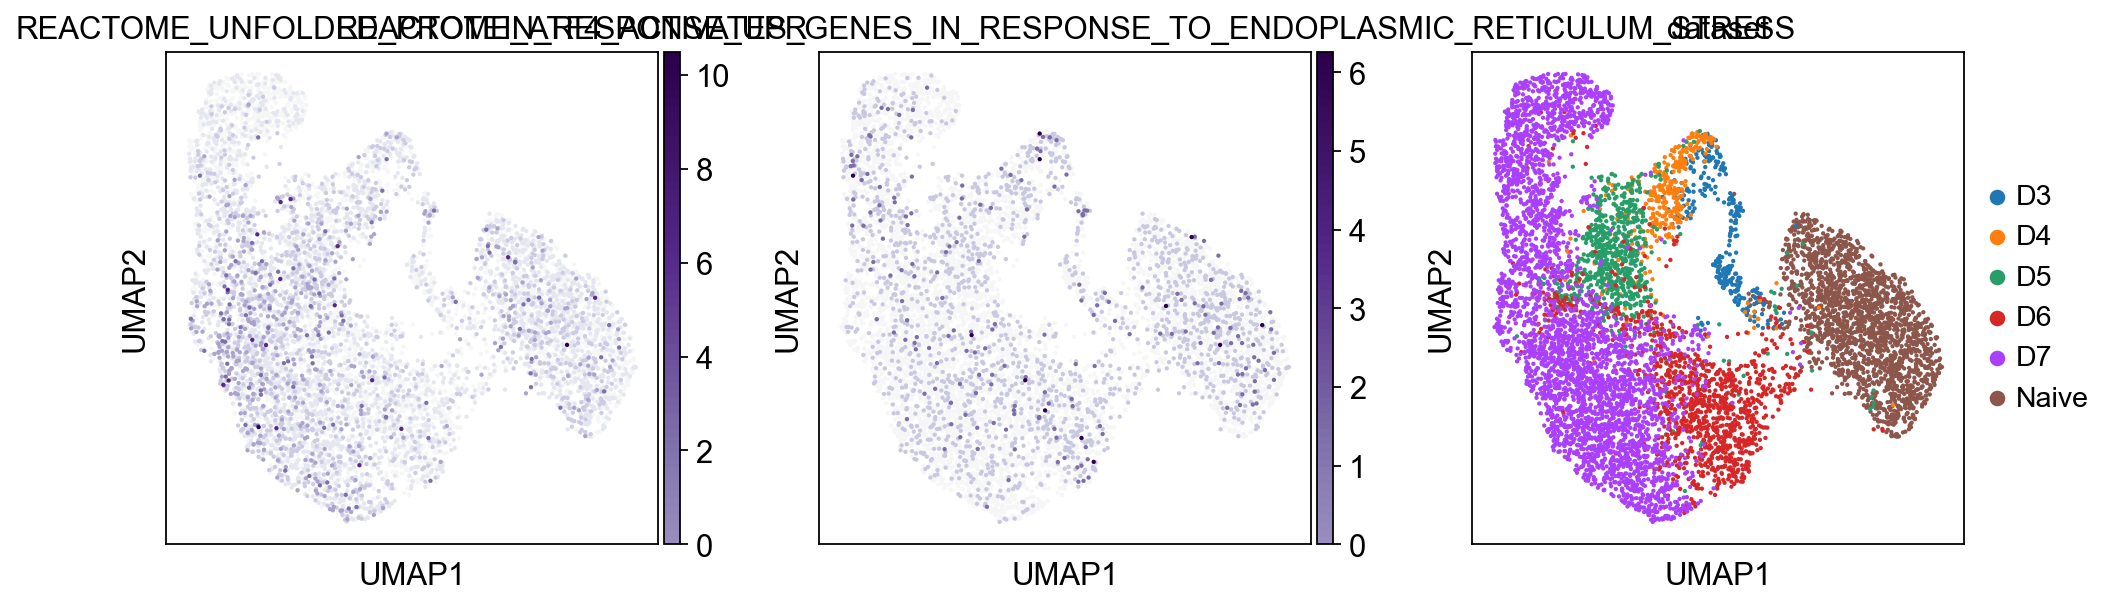

In [44]:
sc.pl.umap(reac_acts, color=['REACTOME_UNFOLDED_PROTEIN_RESPONSE_UPR', 'dataset'], cmap='PuOr', vcenter=0)

/Users/luiscorrea/opt/anaconda3/envs/scFUN/lib/python3.8/site-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


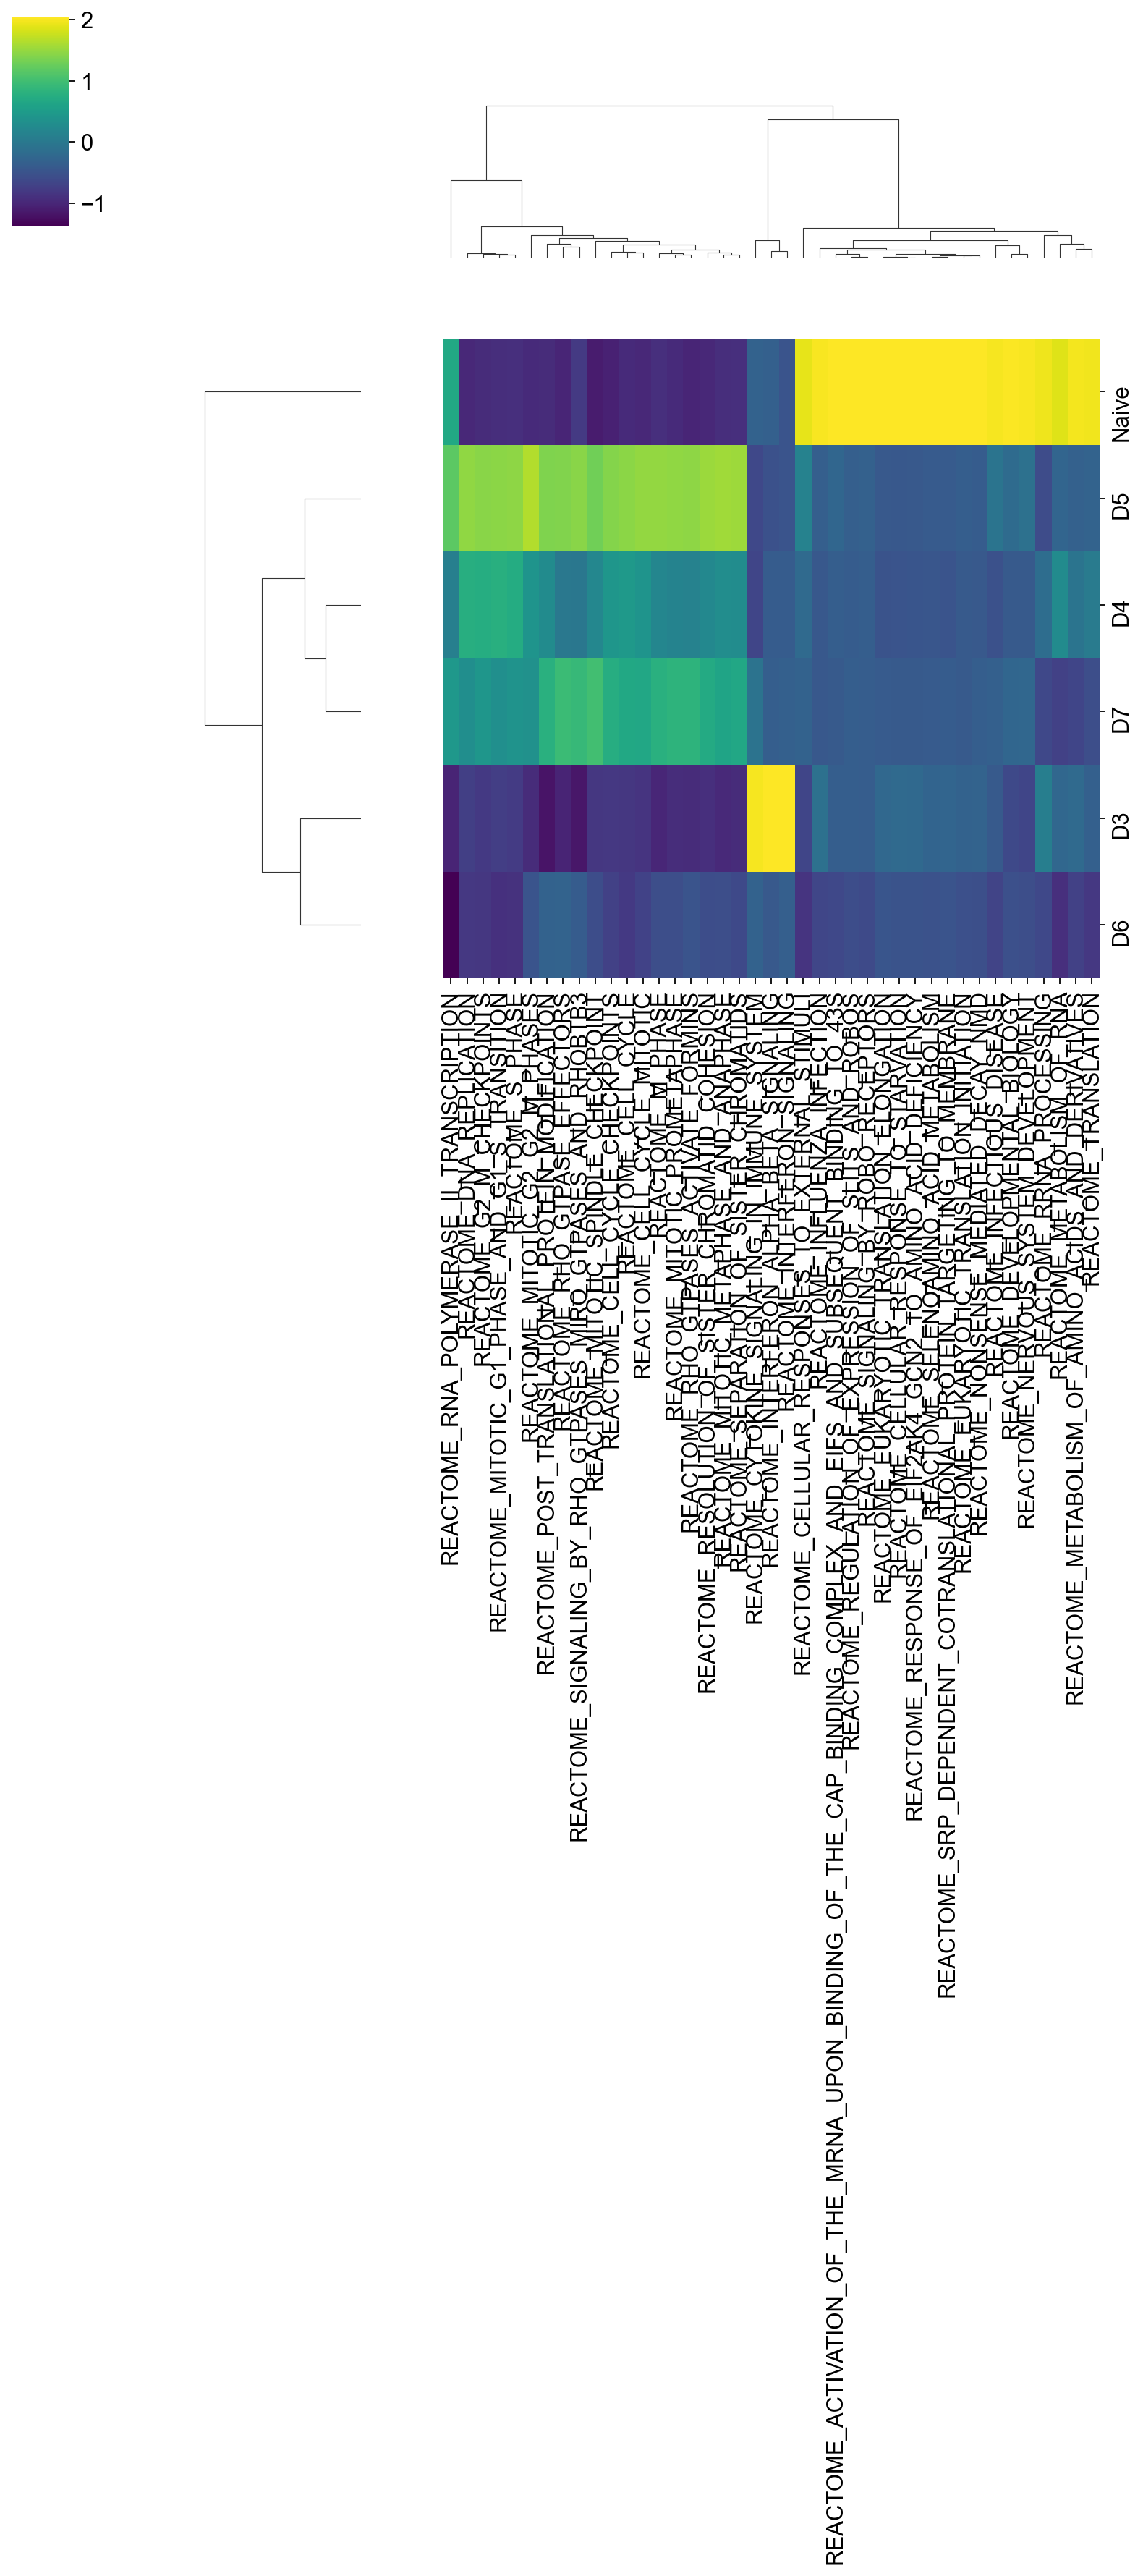

In [47]:
reac_mean_enr = dc.summarize_acts(reac_acts, groupby='dataset', min_std=1)
reac_mean_enr
sns.clustermap(reac_mean_enr, xticklabels=reac_mean_enr.columns, cmap='viridis',z_score=True)
plt.show()

In [48]:
'immunologic_signatures'

'immunologic_signatures'

In [49]:
msigdb_imm=msigdb_all[msigdb_all['collection']=='immunologic_signatures']
msigdb_imm= msigdb_imm[~msigdb_imm.duplicated(['geneset', 'genesymbol'])]

In [50]:
dc.run_ora(mat=scData, net=msigdb_imm, source='geneset', target='genesymbol',use_raw=False)

/Users/luiscorrea/opt/anaconda3/envs/scFUN/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [51]:
imm_acts = dc.get_acts(scData, obsm_key='ora_estimate')
imm_acts

AnnData object with n_obs × n_vars = 7971 × 4941
    obs: 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    uns: 'dataset_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'mlm_estimate', 'mlm_pvals'

In [52]:
imm_

NameError: name 'imm_' is not defined

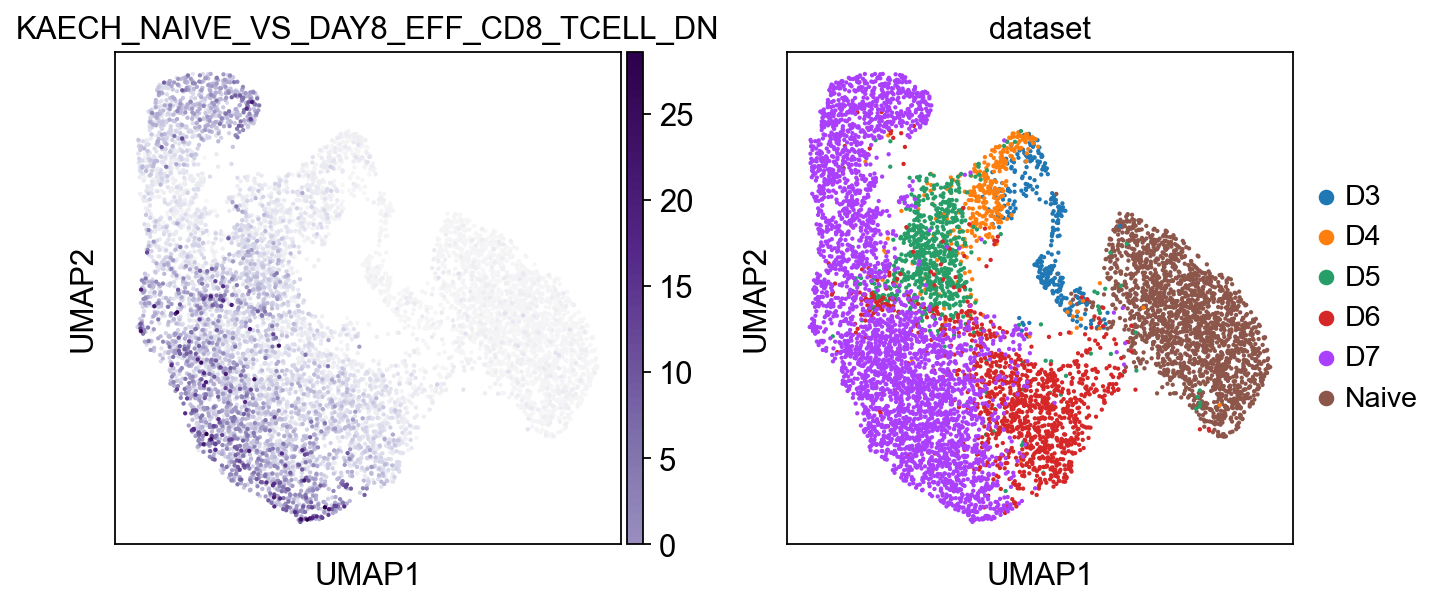

In [53]:
sc.pl.umap(imm_acts, color=['KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_DN','dataset'], cmap='PuOr', vcenter=0)
#

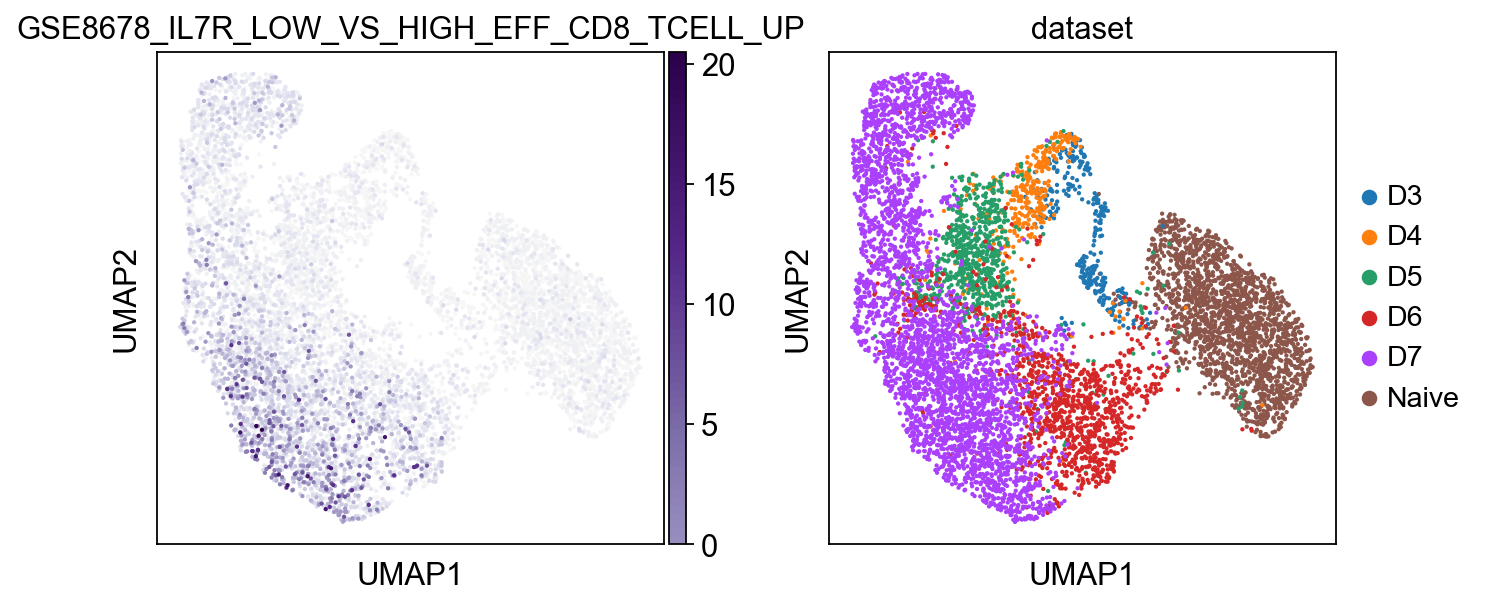

In [54]:

sc.pl.umap(imm_acts, color=['GSE8678_IL7R_LOW_VS_HIGH_EFF_CD8_TCELL_UP','dataset'], cmap='PuOr', vcenter=0)
#

In [ ]:
imm_mean_enr = dc.summarize_acts(imm_acts, groupby='dataset', min_std=4.3)
imm_mean_enr
sns.clustermap(imm_mean_enr, xticklabels=imm_mean_enr.columns, cmap='viridis',z_score=True,%)
plt.show()